# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [2]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import color
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from skimage import exposure
from skimage import filters
from skimage.filters import rank
from skimage import transform
from skimage import img_as_ubyte

from scipy import signal
from scipy.io import wavfile
from scipy import fftpack



Pretty printing has been turned ON


## 2D - Discrete Fourier Transform
**1.1** Consider a syntetic image as following:

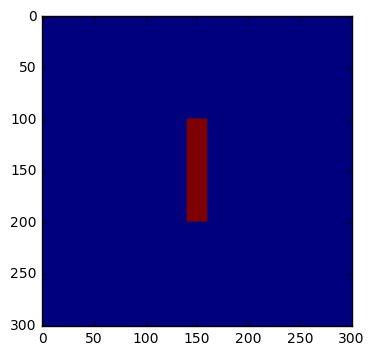

In [3]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

plt.figure()
plt.imshow(img)

**1.2** We can compute the FFT as follows:

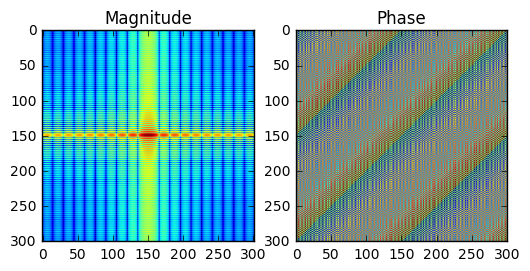

In [4]:
# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')


**1.3** Compute the FFT of translated, rotated and other verisons of the synthetic image and illustrate the magnitude and phase of the frequency response. 

Discuss your observations

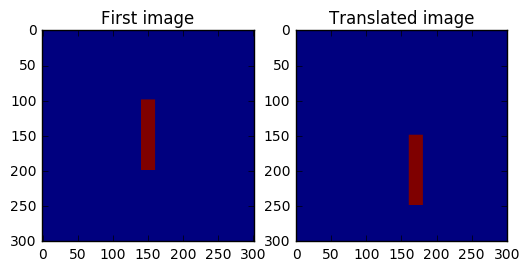

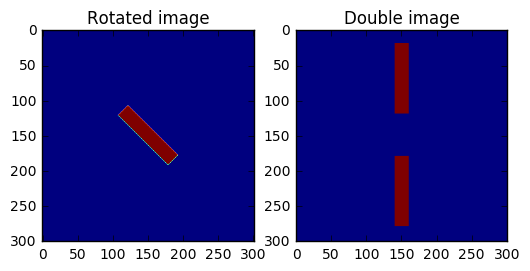

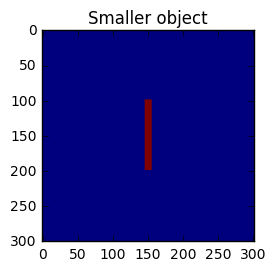

In [12]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

# Create a synthetic image
img_trans = np.zeros((301,301))
# Draw a rectangle inside
img_trans[150:250, 160:180] = 255

img_rot = transform.rotate(img, 45)

# Create a synthetic image
img2 = np.zeros((301,301))
# Draw a rectangle inside
img2[20:120, 140:160] = 255
img2[180:280, 140:160] = 255


# Create a synthetic image
img3 = np.zeros((301,301))
# Draw a rectangle inside
img3[100:200, 145:155] = 255

plt.figure
plt.subplot(121)
plt.imshow(img)
plt.title('First image')

plt.subplot(122)
plt.imshow(img_trans)
plt.title('Translated image')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(img_rot)
plt.title('Rotated image')

plt.subplot(122)
plt.imshow(img2)
plt.title('Double image')
plt.show()

plt.figure
plt.subplot(121)
plt.imshow(img3)
plt.title('Smaller object')
plt.show()


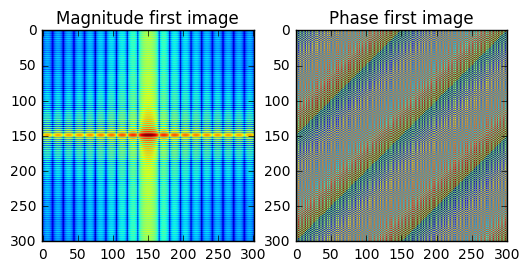

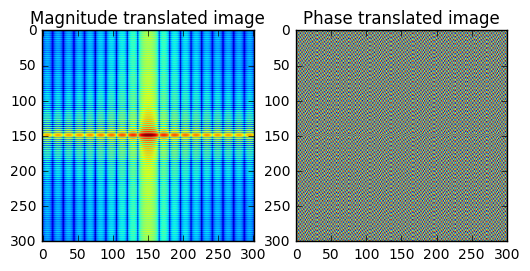

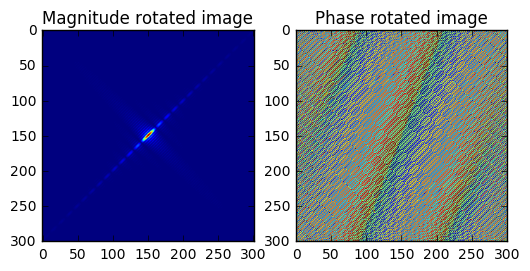

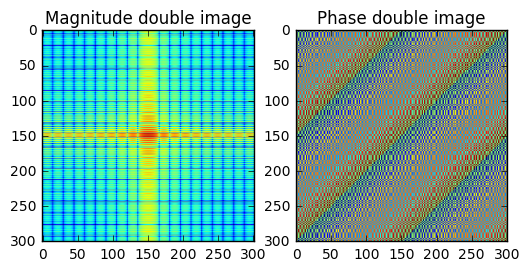

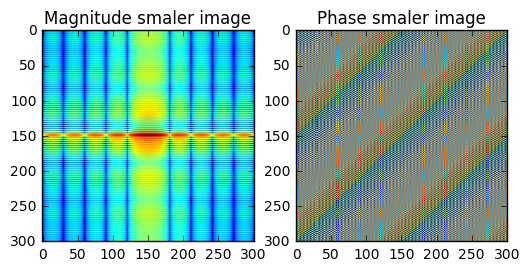

In [14]:
fft_freq = np.fft.fftshift(np.fft.fft2(img))
plt.figure
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(fft_freq)))
ax1.set_title('Magnitude first image')
ax2.imshow(np.angle(fft_freq))
ax2.set_title('Phase first image')

fft_trans = np.fft.fftshift(np.fft.fft2(img_trans))
plt.figure
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(fft_trans)))
ax1.set_title('Magnitude translated image')
ax2.imshow(np.angle(fft_trans))
ax2.set_title('Phase translated image')

fft_rot = np.fft.fftshift(np.fft.fft2(img_rot))
plt.figure
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow((np.abs(fft_rot)))
ax1.set_title('Magnitude rotated image')
ax2.imshow(np.angle(fft_rot))
ax2.set_title('Phase rotated image')

fft_double = np.fft.fftshift(np.fft.fft2(img2))
plt.figure
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(fft_double)))
ax1.set_title('Magnitude double image')
ax2.imshow(np.angle(fft_double))
ax2.set_title('Phase double image')

fft_smal = np.fft.fftshift(np.fft.fft2(img3))
plt.figure
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(fft_smal)))
ax1.set_title('Magnitude smaler image')
ax2.imshow(np.angle(fft_smal))
ax2.set_title('Phase smaler image')


We can see that changing place of the image doesn''t effect to the magnitude frequncy, but change in the phase, 
'becouse phase gives us information about position , shape and angles. When magnitude shows us information about changing in 
'special(time) domain

**1.4** Lets consider another synthetic image as follows, compute the phase and the magnitude of the followig image and display the normalized center frequency 

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


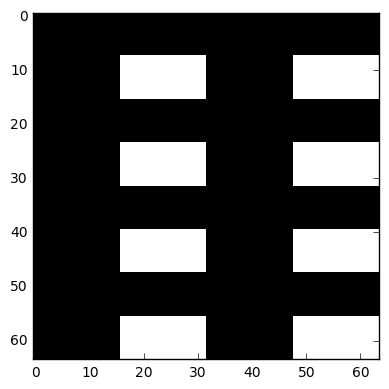

the normalized center frequency is equal to 0.25
the mean is equal to  0.25


C:\Users\julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


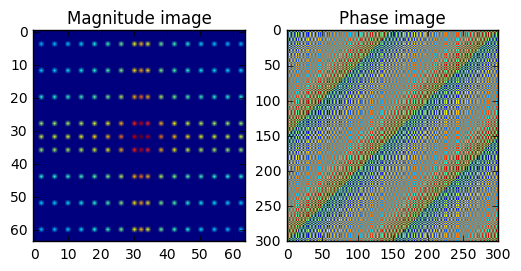

In [28]:
N = 64
Img = np.zeros((N,N))
# Length of the signal
T = 1. 
# Sampling period 
Ts = T/N 
Fs = 1./Ts
df = Fs/N
tem = np.ones((8,16))
Img[N/8:N/4, N/4:N/2] = tem 
Img[0:N/4,N/2:] = Img[0:N/4, :N/2]
Img[N/4:N/2,:] = Img[0:N/4 ,:]
Img[N/2:,:] = Img[0:N/2,:]
fft_Img = np.fft.fftshift(np.fft.fft2(Img))

plt.figure
io.imshow(Img)
plt.show()

plt.figure
f, (ax1, ax2 ) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(fft_Img)))
ax1.set_title('Magnitude image')
ax2.imshow(np.angle(fft_double))
ax2.set_title('Phase image')

size = [];
size = np.shape(Img);
n = size[0];
m = size [1];

centr_freq = np.abs(fft_Img[n/2, m/2])/(n*m);
mean = np.mean (Img);
print ('the normalized center frequency is equal to', centr_freq )
print ('the mean is equal to ', mean)



**1.5** Plot $|I_{f}(u,0)|$ and $|I_{f}(0,v)|$ with the corrrect frequency range. 

Discuss your observations.


C:\Users\julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


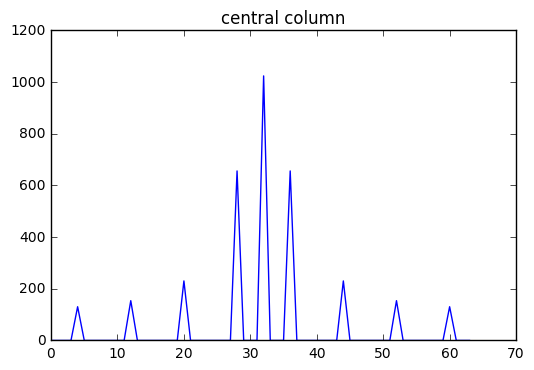

C:\Users\julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


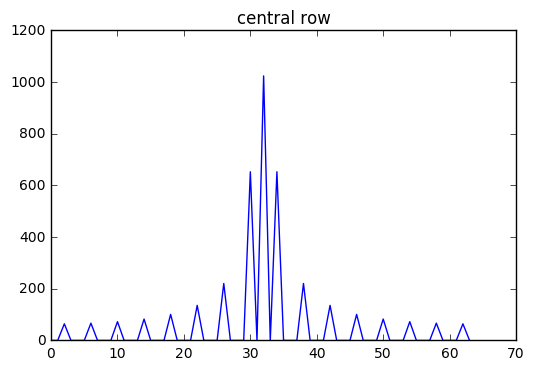

In [35]:
plt.figure
plt.plot(np.abs(fft_Img[:, m/2]))
plt.title ('central column')
plt.show()

plt.figure
plt.plot(np.abs(fft_Img[n/2, :]))
plt.title ('central row')
plt.show()


**1.6** Load the `lena` image, and show its phase and its magnitude, then reconstruct the image using either frequency or phase. 

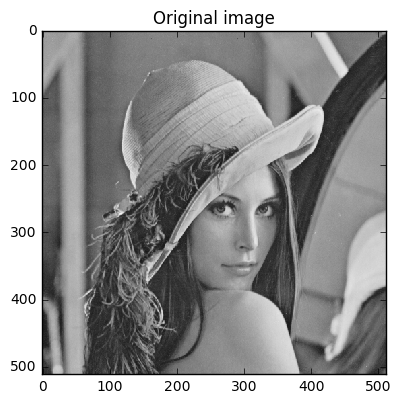

C:\Users\julia\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


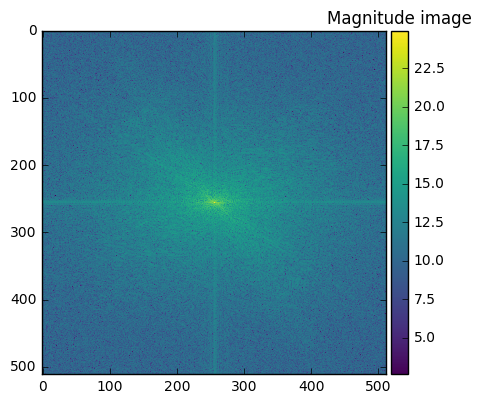

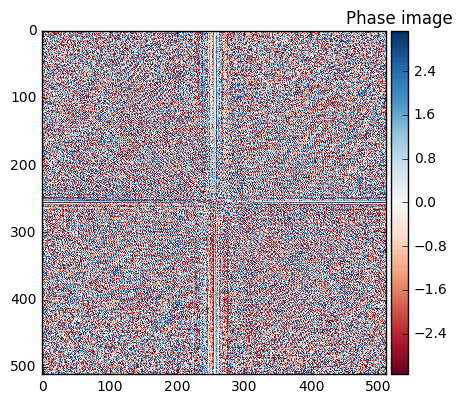

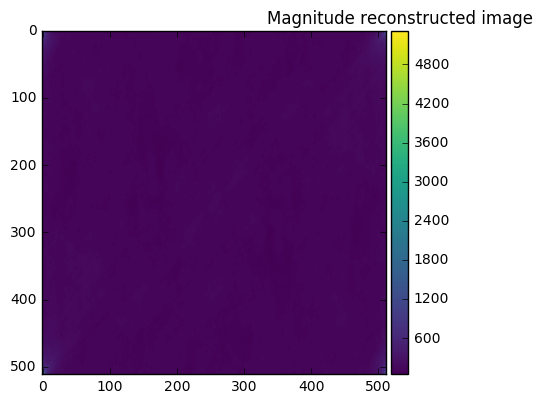

C:\Users\julia\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


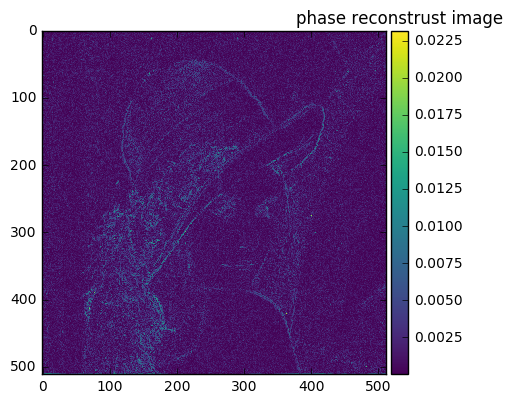

In [3]:
Path = '../images/'
image_name = 'lena-grey.bmp'
lena = io.imread(Path.__add__(image_name))
fft_lena = np.fft.fftshift(np.fft.fft2(lena))

plt.figure
io.imshow(lena)
plt.title('Original image')
plt.show()

Mag = np.abs(fft_lena)
plt.figure
io.imshow(exposure.adjust_log(Mag))
plt.title('Magnitude image')
plt.show()


phase = np.angle(fft_lena)
plt.figure     
io.imshow(phase)
plt.title('Phase image')
plt.show()


plt.figure     
io.imshow(np.abs(np.fft.ifft2(Mag)))
plt.title('Magnitude reconstructed image')
plt.show()

plt.figure     
io.imshow(np.abs(np.fft.ifft2(np.exp(1j*phase))))
plt.title('phase reconstrust image')
plt.show()



**1.7** Apply the sobel filter only in vertical direction to `lena` image in the frequency domain.

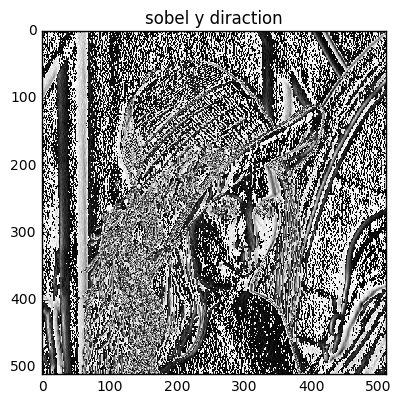

C:\Users\julia\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


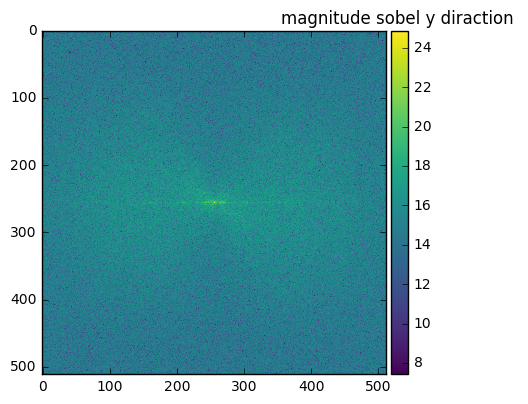

In [7]:
from scipy import ndimage
sy = ndimage.sobel (lena, axis = 1, mode = 'constant')
plt.figure     
io.imshow(sy)
plt.title('sobel y diraction')
plt.show()

fft_sy = np.fft.fftshift(np.fft.fft2(sy))
plt.figure     
io.imshow(exposure.adjust_log(np.abs(fft_sy)))
plt.title('magnitude sobel y diraction ')
plt.show()


### Filtering in Frequency domain 

In order to build a frequency filter $H(u,v)$ from its spatial counterpart $h(x,y)$, we need to:

1. Build a zero padded spatial filter $h_p(x,y)$
1. Shift $h_p(x,y)$ by $(-1)^{x+y}$
1. Compute the DFT to obtain $H(u,v)$
1. Shift $H(u,v)$ by $(-1)^{x+y}$

In order to aboid the wraparound error, the image need to be zero padded

In order to perform the filtering, we need to:

1. Find the padded image size
1. Pad the image
1. Convert the spatial filter to frequency filter
1. Compute the DFT of the image with additional shift
1. Apply the multiplication in the Fourier space
1. Compute the inverse Fourier transform
1. Crop the image at its original size